In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

# Setting up
Lets first read our data and see what we are dealing with. We are going to predict housing prices in King County, WA.

I am going to run some basic checks to see what my data looks like

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.columns #looks like we don't have to deal with any importing issues so far

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

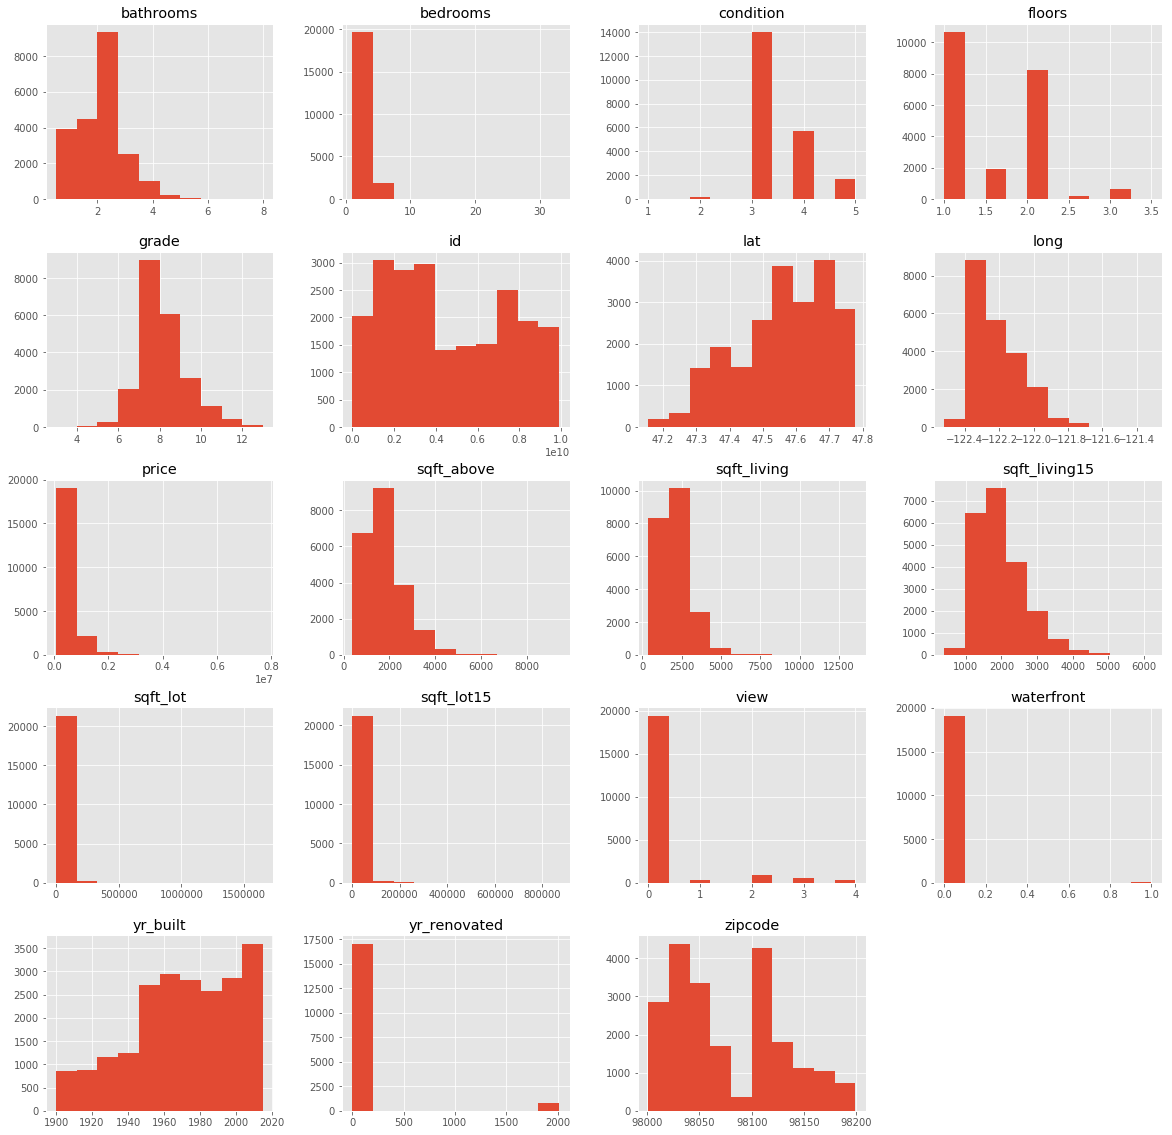

In [4]:
plt.style.use('ggplot')
df.hist(figsize = (20,20)); #checking size and dists

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


There is a big variation (sigma > mu) in yr_renovated and sqft_lot15. Also extreme values in sqft_lot15, bathrooms, and bedrooms. I have learned that there is some conflicting information about the columns sqft_lot15 and sqft_living15 concerning what they represent and contain.

I will drop sqft_15s columns. Also I lets start some investigation into bathrooms and bathroom's extreme values.

In [6]:
df.drop(['sqft_living15', 'sqft_lot15'],axis=1, inplace=True)

df.bathrooms.nlargest(), df.bedrooms.nlargest()

(7245     8.00
 12764    8.00
 9245     7.75
 8537     7.50
 4020     6.75
 Name: bathrooms, dtype: float64, 15856    33
 8748     11
 13301    10
 15147    10
 19239    10
 Name: bedrooms, dtype: int64)

I will deal with bathroom further down the line when I check for outliers since it looks like there is some spread into the higher values.  

I will delete the property with 33 bedrooms though.

In [7]:
df.drop(15856, inplace=True) #droppping by the index

In [8]:
df.bedrooms.nlargest()

8748     11
13301    10
15147    10
19239    10
4092      9
Name: bedrooms, dtype: int64

### Datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 19 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       19220 non-null float64
view             21533 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     17754 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
dtypes: float64(8), int64(9), object(2)
memory usage: 3.3+ MB


Lets make them all the correct data types.

In [10]:
df.sqft_basement = df.sqft_basement.astype('float')

ValueError: could not convert string to float: '?'

It looks like there may be some placeholder in the data.

In [11]:
sum(df.sqft_basement == "?")

454

There are 454 '?' placeholders in the .sqft_basement . I will need to take care of them.

In [12]:
mask = df.sqft_basement == '?' #This sets our condtional situation.
column_name = 'sqft_basement' #what columns we effect with our mask
df.loc[mask, column_name] = 0

#df.loc[df.sqft_basement == '?', 'sqft_basement'] = 0 #Works the same way above.
#I like having options

In [13]:
df.sqft_basement = df.sqft_basement.astype('float64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 19 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       19220 non-null float64
view             21533 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
yr_renovated     17754 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
dtypes: float64(9), int64(9), object(1)
memory usage: 3.3+ MB


Now for the categorical variables

In [15]:
cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']
for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 19 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null category
bathrooms        21596 non-null category
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null category
waterfront       19220 non-null category
view             21533 non-null category
condition        21596 non-null category
grade            21596 non-null category
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null category
yr_renovated     17754 non-null category
zipcode          21596 non-null category
lat              21596 non-null float64
long             21596 non-null float64
dtypes: category(10), float64(4), int64(4), object(1)
memory usage: 1.9+ MB


In [16]:
df.describe() #checking to see if everything looks in order.

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long
count,2.159600e+04,2.159600e+04,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,2080.343165,1.509983e+04,1788.631506,285.702954,47.560087,-122.213977
std,2.876764e+09,3.673760e+05,918.122038,4.141355e+04,827.763251,439.825454,0.138552,0.140725
min,1.000102e+06,7.800000e+04,370.000000,5.200000e+02,370.000000,0.000000,47.155900,-122.519000
25%,2.123049e+09,3.220000e+05,1430.000000,5.040000e+03,1190.000000,0.000000,47.471100,-122.328000
50%,3.904930e+09,4.500000e+05,1910.000000,7.619000e+03,1560.000000,0.000000,47.571800,-122.231000
75%,7.308950e+09,6.450000e+05,2550.000000,1.068550e+04,2210.000000,550.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,47.777600,-121.315000


Lets check the how random the missing data is using a nifty library [missingno](https://github.com/ResidentMario/missingno).

In [17]:
import missingno as msno

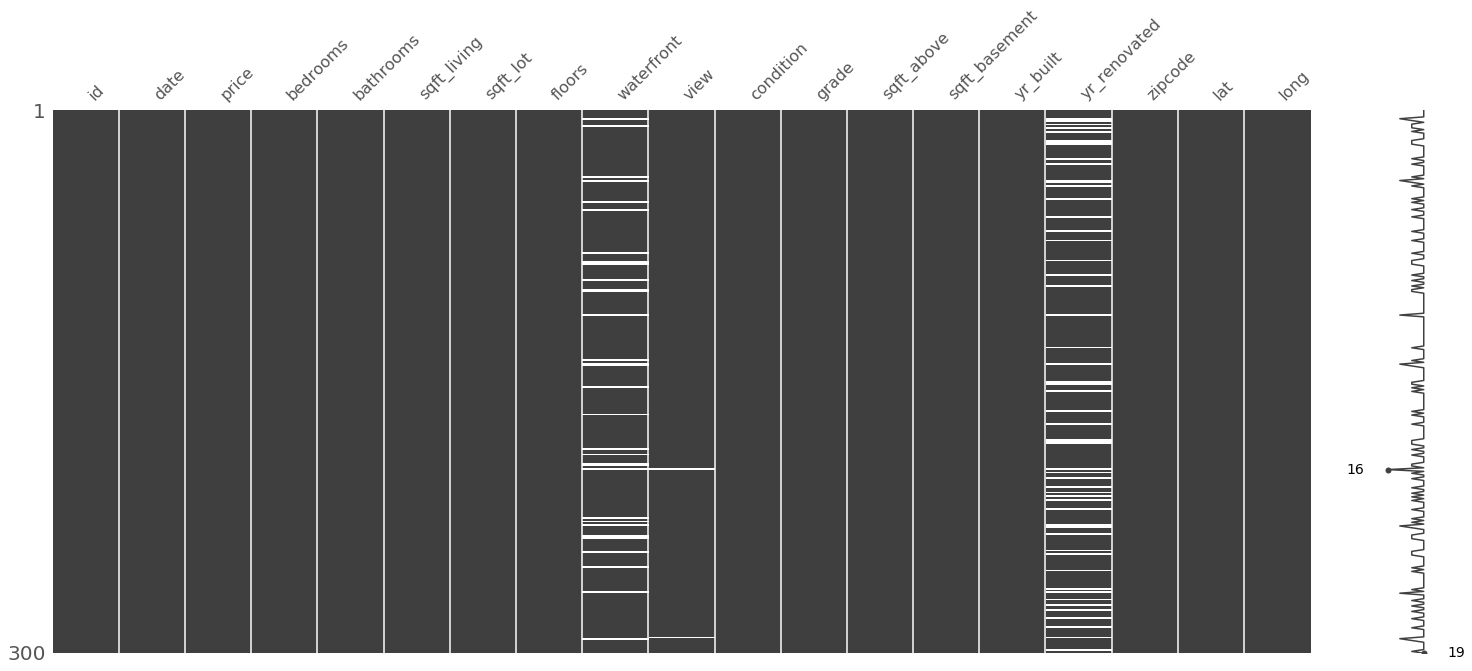

In [18]:
df = df.replace("nan", np.nan) #makes all the nan values into the pandas friendly version. 
msno.matrix(df.sample(300))

So this shows us a sample of our data set and where the data is missing by columns. It looks fairly random where it is missing. That is good.

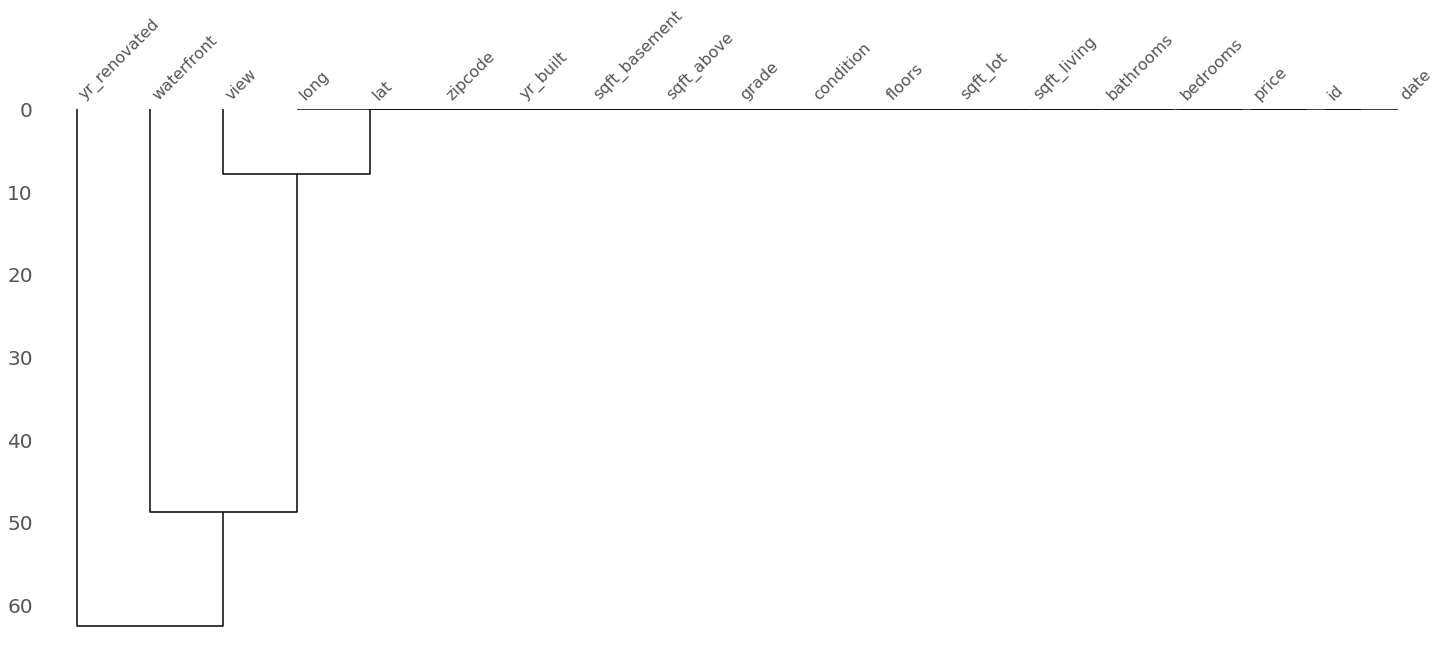

In [19]:
msno.dendrogram(df)

Viewing the dendrogram, we can see that the missing waterfront and yr_renovated do not correspond within their own missing data. We can verify it with the heatmap

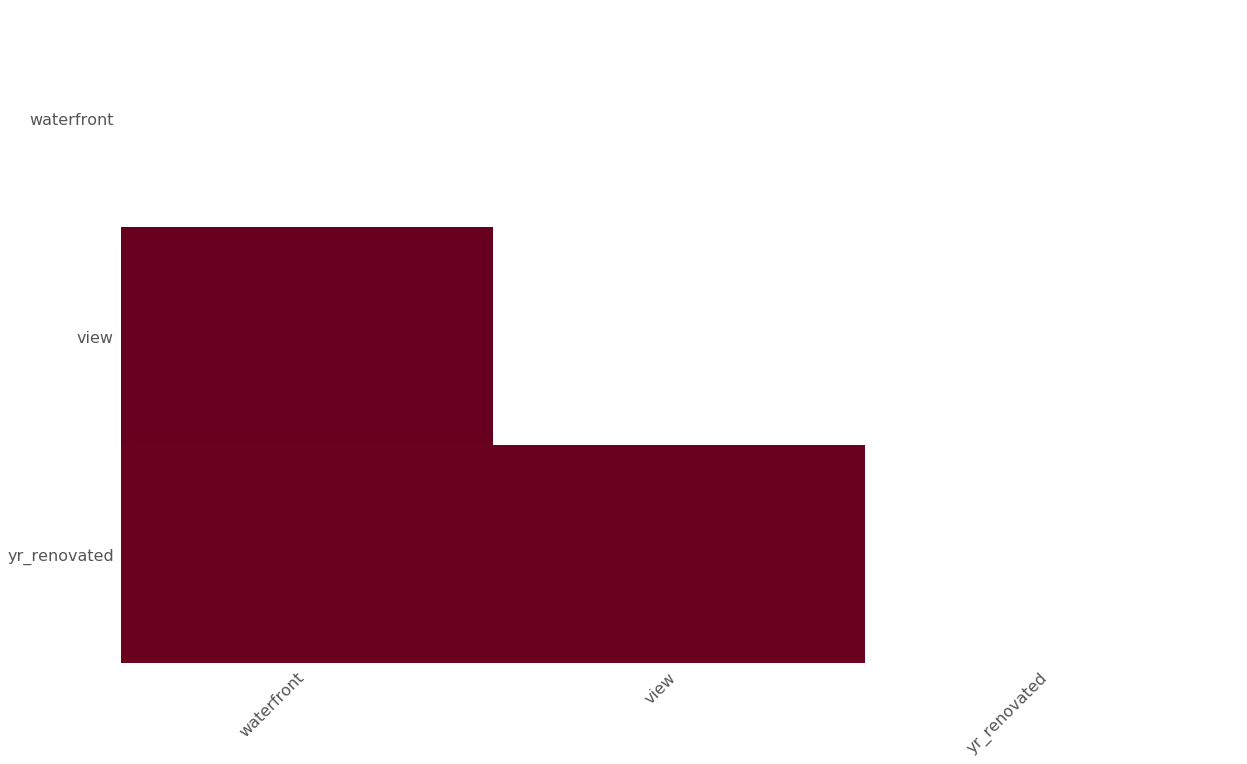

In [20]:
msno.heatmap(df)

Yep, no interaction so starting to leaning towards not having to fret about how these values went missing for this set. But we have one more check left.

Finally lets group this data into relative regions of lat and long by using zip codes, which allows up to check the geographic distribution of the missing data. 

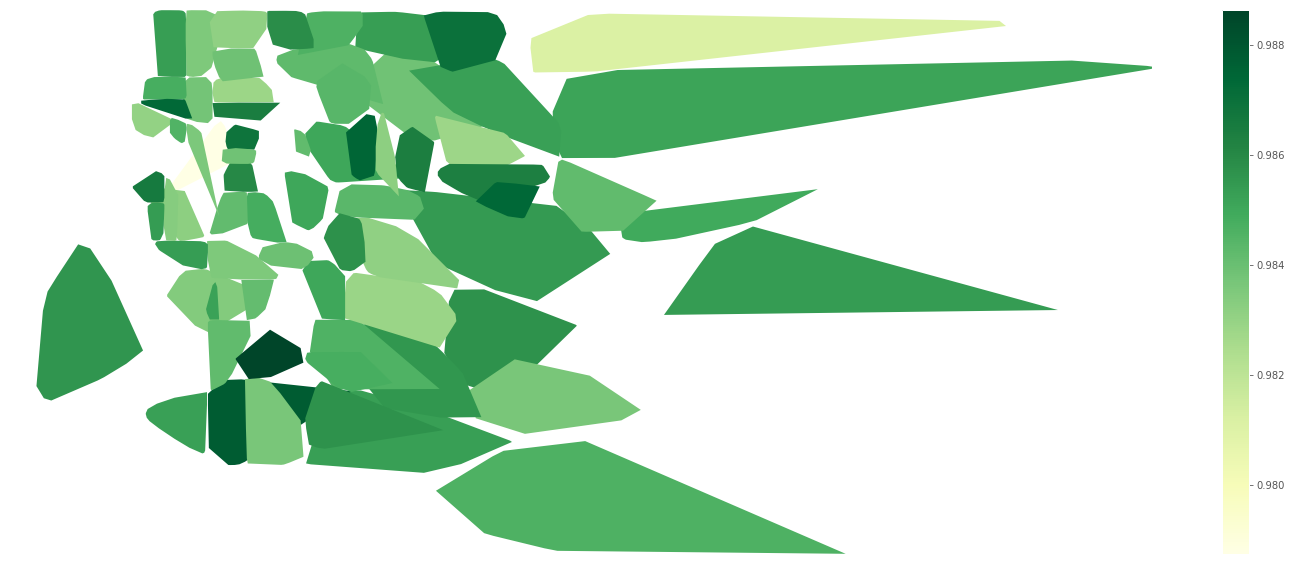

In [21]:
msno.geoplot(df, x='long', y='lat', by='zipcode')

The number of values left blank range by almost 10% and the distances look random enough (there is no disproption in the western rurals areas). **Look at an real map to comparison.** You can kind of see the lake...

In [24]:
import folium
n = folium.Map(
    location = [df.lat.mean(), df.long.mean()])
n

Lets start tackling the empty cells as well as checking for incorrect data types.

In [26]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
dtype: int64

In [27]:
df.waterfront.isna().sum()/len(df)

0.11002037414335988

So 10% of my data for waterfront is missing. I am going to remove that column, along with yr_renovated as well since trying to reconstruct time data without any other kind of supporting information is foolhardy.  

In [28]:
df.drop(['waterfront', 'yr_renovated'], axis=1, inplace=True)

In [29]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
zipcode           0
lat               0
long              0
dtype: int64

---
Now it finally take care of the 63 NaN values in view.

In [30]:
df.view.value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [31]:
df.view.fillna(0, inplace = True) #safely replacing the missing values with zero
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
dtype: int64

In [32]:
df_pred = df.drop(['id', 'date', ], axis=1) #Making a prediction df to check correlation
df_pred.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045


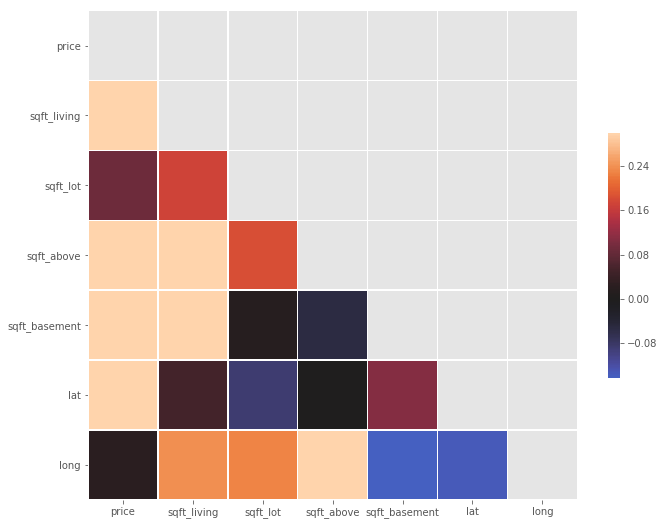

In [33]:
corr = df_pred.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

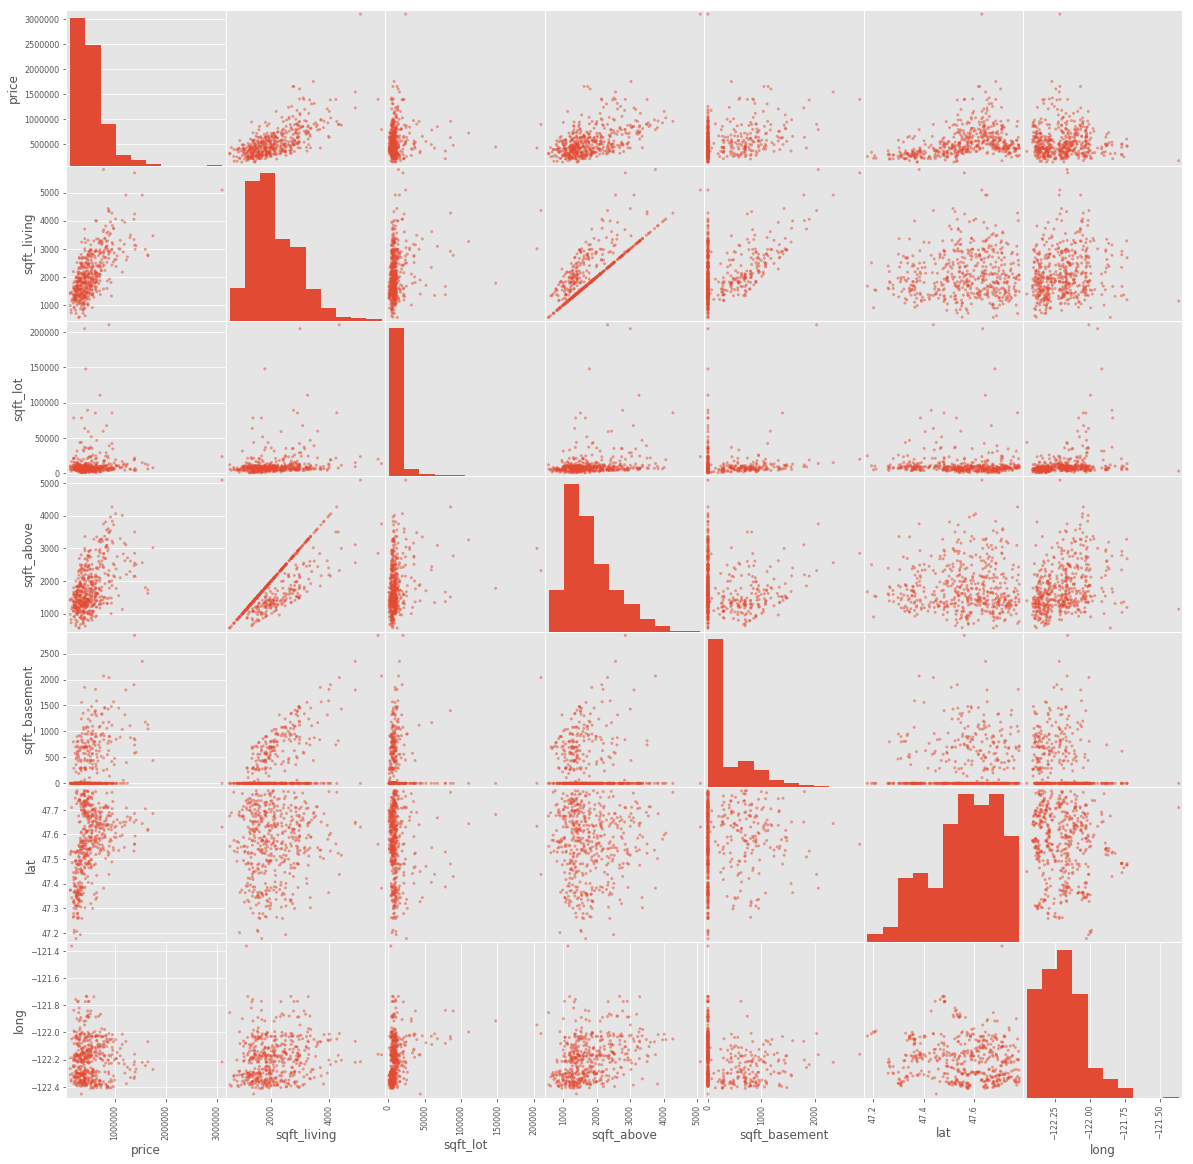

In [34]:
pd.plotting.scatter_matrix(df_pred.sample(500),figsize  = [20, 20]);

---
Looking at this, I am going to combine all the sqfts into one variable.

In [35]:
df_pred['sqft_household'] = df_pred.sqft_above + df_pred.sqft_basement + df_pred.sqft_living
df_pred.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_household
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,2360.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,5140.0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,1540.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,3920.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,3360.0


In [36]:
df_pred.drop(['sqft_above', 'sqft_basement', 'sqft_living'], axis=1, inplace=True)

Now lets recheck the correlation and scatter plots, checking for colinearity.

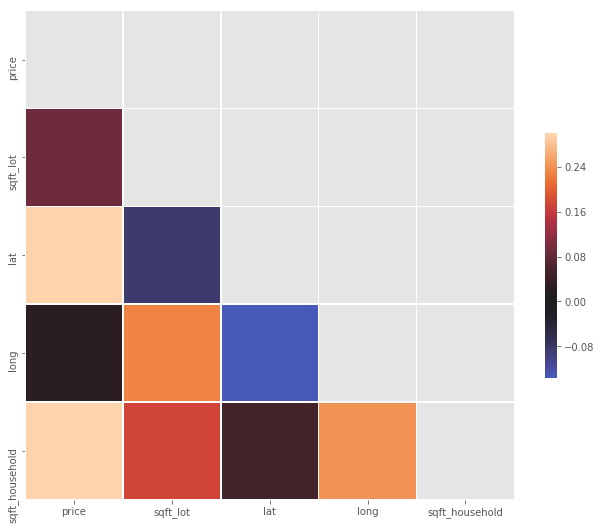

In [37]:
corr = df_pred.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


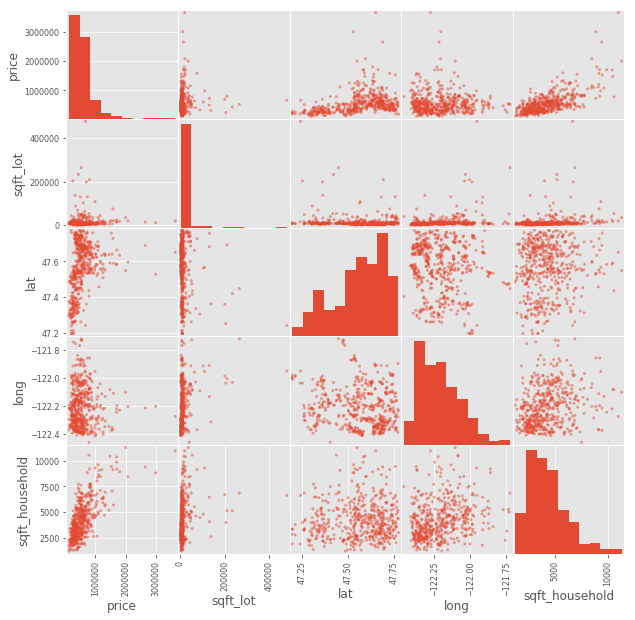

In [38]:
pd.plotting.scatter_matrix(df_pred.sample(500),figsize  = [10, 10]);

In [39]:
df_pred.corr()

,price,sqft_lot,lat,long,sqft_household
price,1.000000,0.089879,0.306687,0.022047,0.701725
sqft_lot,0.089879,1.000000,-0.085507,0.230222,0.173566
lat,0.306687,-0.085507,1.000000,-0.135340,0.051942
long,0.022047,0.230222,-0.135340,1.000000,0.242271
sqft_household,0.701725,0.173566,0.051942,0.242271,1.000000


So it looks like none of the predictors have any real strong correlation between themselves and, logically, sqft strongly correlates with price.

Before I normalize our data and remove outliers, we still have to decide on what to do with lat and long. I could bin them and turn them into categorical data but since they are a set, and since I have some geolocation information from zipcodes, dropping them is the best plan of attack.

In [46]:
df_pred.drop(['lat','long'], axis =1, inplace=True)
df_pred.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,yr_built,zipcode,sqft_household
0,221900.0,3,1.00,5650,1.0,0.0,3,7,1955,98178,2360.0
1,538000.0,3,2.25,7242,2.0,0.0,3,7,1951,98125,5140.0
2,180000.0,2,1.00,10000,1.0,0.0,3,6,1933,98028,1540.0
3,604000.0,4,3.00,5000,1.0,0.0,5,7,1965,98136,3920.0
4,510000.0,3,2.00,8080,1.0,0.0,3,8,1987,98074,3360.0


Now lets normalize our continuous data.

In [48]:
df_pred.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'yr_built', 'zipcode', 'sqft_household'],
      dtype='object')

In [49]:
log_price = np.log(df_pred.price)
log_sqfthouse = np.log(df_pred.sqft_household)
log_sqftlot = np.log(df_pred.sqft_lot)

scaled_price = (log_price - np.mean(log_price))/np.sqrt(np.var(log_price))
scaled_sqfthouse = (log_sqfthouse - np.mean(log_sqfthouse))/np.sqrt(np.var(log_sqfthouse))
scaled_sqftlot = (log_sqftlot - np.mean(log_sqftlot))/np.sqrt(np.var(log_sqftlot))

df_pred_scaled = df_pred[['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'zipcode', 'yr_built', 'grade']]
df_pred_scaled['price'] = scaled_price
df_pred_scaled['sqfthouse'] = scaled_sqfthouse
df_pred_scaled['sqftlot'] = scaled_sqftlot

C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [52]:
df_pred_scaled.head()

,bedrooms,bathrooms,floors,view,condition,zipcode,yr_built,grade,price,sqfthouse,sqftlot
0,3,1.00,1.0,0.0,3,98178,1955,7,-1.401982,-1.122613,-0.388446
1,3,2.25,2.0,0.0,3,98125,1951,7,0.279969,0.713013,-0.113256
2,2,1.00,1.0,0.0,3,98028,1933,6,-1.799418,-2.129293,0.244461
3,4,3.00,1.0,0.0,5,98136,1965,7,0.499731,0.074024,-0.523930
4,3,2.00,1.0,0.0,3,98074,1987,8,0.178463,-0.289499,0.008125


Now to take care of outliers. Lets check out some boxplots to verify.

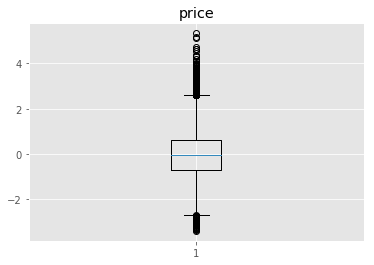

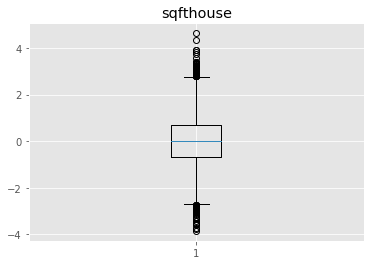

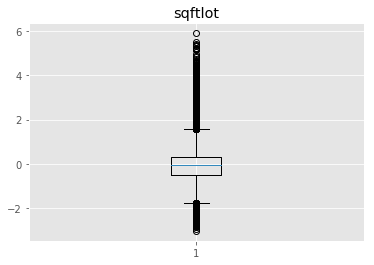

In [59]:
to_plot = ['price', 'sqfthouse', 'sqftlot']
for plot in to_plot:
    plt.boxplot(df_pred_scaled[plot])
    plt.title(plot)
    plt.show()

I will use the IQR to take care of them.

In [53]:
def remove_outlier(df_in, col_names):
    df_out = df_in
    for col in col_names:
        q1 = df_in[col].quantile(0.25)
        q3 = df_in[col].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[col] > fence_low) & (df_in[col] < fence_high)]
    return df_out

In [55]:
sliming = ['price', 'sqfthouse', 'sqftlot']
df_slim = remove_outlier(df_pred_scaled, sliming)
df_pred_scaled.shape, df_slim.shape

((21596, 11), (19042, 11))

So we did remove a nice portion of data. Lets check the histograms one more time to make sure everything is looking good.

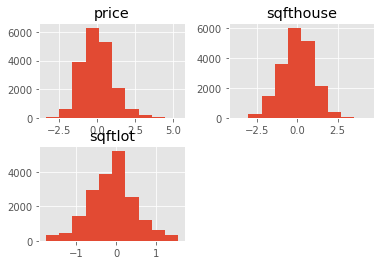

In [58]:
df_slim.hist();

Now final steps of cleaning up, lets make some dummies for the categorical data.

In [61]:
bedroom_dummies = pd.get_dummies(df_slim.bedrooms, prefix="bedroom")
bathroom_dummies = pd.get_dummies(df_slim.bathrooms, prefix='bathrooms')
floors_dummies = pd.get_dummies(df_slim.floors, prefix="floors")
view_dummies = pd.get_dummies(df_slim.view, prefix="view")
condition_dummies = pd.get_dummies(df_slim.condition, prefix="condition")
zipcode_dummies = pd.get_dummies(df_slim.zipcode, prefix="zip")
grade_dummies = pd.get_dummies(df_slim.grade, prefix="grade")

df_final = pd.concat([df_slim,bedroom_dummies,bathroom_dummies,floors_dummies,view_dummies,condition_dummies,zipcode_dummies,grade_dummies],axis=1)

df_final.drop(['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'zipcode'], axis=1,inplace=True)

In [65]:
df_final.shape

(19042, 141)

___
---

## Lets try to find our inital model.

I am going to look for an accurate model for our data. This would be used for real estate appraisal in this given area.

Lets start by splitting out data and then running some lasso regression

In [118]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

y = df_final.price
X = df_final.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

I will initially take alphas .01, .001, and .0001. 

In [119]:
from sklearn.linear_model import LassoCV

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test) #This score is R^2
coeff_used001 = np.sum(lasso001.coef_!=0)


In [120]:
train_score001, test_score001 ,coeff_used001

(0.6540434733622273, 0.6519900612534736, 30)

In [125]:
lasso0001 = Lasso(alpha=0.001, max_iter=10e5)
lasso0001.fit(X_train,y_train)

train_score0001=lasso0001.score(X_train,y_train)
test_score0001=lasso0001.score(X_test,y_test) #This score is R^2
coeff_used0001 = np.sum(lasso0001.coef_!=0)

In [126]:
train_score0001, test_score0001 ,coeff_used0001

(0.875276177813678, 0.8707826984543063, 91)

In [127]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test) #This score is R^2
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [128]:
train_score00001, test_score00001 ,coeff_used00001

(0.8866546036990558, 0.878670504561762, 117)

As expected, decreasing alpha increase the number of coefficents used. The difference between $\alpha = 0.001$ and $\alpha = 0.0001$ only changed our $R^2$ by ~$.015$ but invloved 20 more coefficents into our model. With only a small number of coefficents to start $141$, those proportion have me considering that sticking with the higher alpha would lead us to overfit our model. 
___

Continuing with $\alpha = 0.001$, lets see what coefficents were the most impactful.

In [142]:
temp = lasso0001.coef_
coef1 = pd.DataFrame(list(zip(X_train.columns, temp))) #Gives me what I want.
something = coef1[1] != 0 #creates the condition I am looking for
coef_final = coef1[something]
coef_final.nlargest(20,1)

,0,1
83,zip_98039,1.343233
62,zip_98004,1.229145
107,zip_98112,0.971559
112,zip_98119,0.801151
84,zip_98040,0.756634
102,zip_98105,0.749265
106,zip_98109,0.740665
100,zip_98102,0.704008
128,zip_98199,0.664251
101,zip_98103,0.661740


So it looks like it is all about location, location, location. Lets see what hurt the most as well.

In [143]:
coef_final.nsmallest(20,1)

,0,1
72,zip_98023,-0.876516
59,zip_98001,-0.810258
60,zip_98002,-0.808722
79,zip_98032,-0.802070
99,zip_98092,-0.785031
61,zip_98003,-0.772031
127,zip_98198,-0.706462
71,zip_98022,-0.697107
85,zip_98042,-0.693611
123,zip_98168,-0.673812


It is all about where you live. Lastly, lets see how the different categories beyond zipcodes effected sale price.

In [156]:
others = ['bedroom', 'bathroom', 'floor', 'view', 'condition', 'grade']
for other in others:
    print(coef_final[coef_final[0].str.contains(other)])

           0         1
4  bedroom_2  0.048908
5  bedroom_3  0.004012
                 0         1
16   bathrooms_1.0 -0.029659
18   bathrooms_1.5 -0.050146
19  bathrooms_1.75 -0.027585
20   bathrooms_2.0 -0.025989
21  bathrooms_2.25 -0.007651
22   bathrooms_2.5 -0.013944
25  bathrooms_3.25  0.052390
26   bathrooms_3.5  0.001660
             0         1
43  floors_1.0 -0.053129
44  floors_1.5 -0.000821
45  floors_2.0  0.014397
           0         1
49  view_0.0 -0.257872
52  view_3.0  0.102224
53  view_4.0  0.618406
              0         1
55  condition_2 -0.121413
57  condition_4  0.052835
58  condition_5  0.163260
            0         1
131   grade_5 -0.632781
132   grade_6 -0.561244
133   grade_7 -0.380378
134   grade_8 -0.144144
135   grade_9  0.134771
136  grade_10  0.357610
137  grade_11  0.567133
138  grade_12  0.653266


Further analysis: 
1. group by zipcode, discover what is the most impactful for each in zipcode. Is having a half bath better when out in the suburbs rather than in the city?
2. remove zipcode, rerun
3. find a way to reconstitute waterfront data and see how it impacts the analysis
4. feature creatation sqft per bedroom, sqft per bathroom and rerun analysis

https://stackoverflow.com/questions/45752299/choropleth-map-with-openstreetmap-data
Chorolpeth zip code map for presentation